In [1]:
import numpy as np
import matplotlib.pyplot as plt

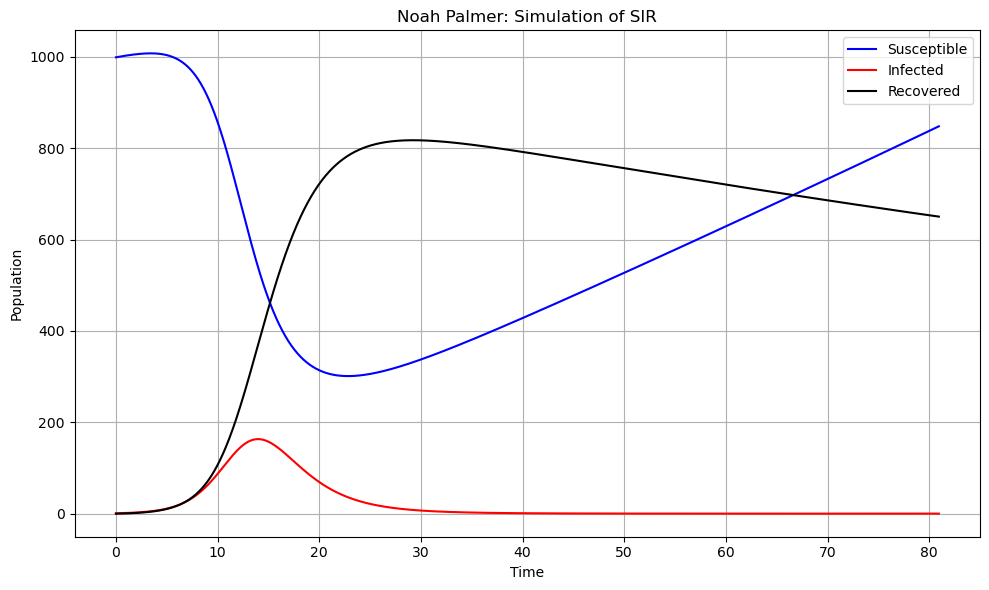

In [10]:
# Parameters
beta = 1; gamma = 0.5; mub = 0.01; mud = (1/2)*mub

T = 81; dt = 0.05
steps = int(T/dt)
t = np.linspace(0, T, steps)

S = np.zeros(steps); I = np.zeros(steps); R = np.zeros(steps)

# ICs
N = 1000
I[0] = 1; S[0] = 999; R[0] = 0


steps_taken = 0 

for i in range(steps-1):
    currentN = S[i] + I[i] + R[i]
    

    if currentN > 1500:
        steps_taken = i+1
        break
    
    dS_dt = mub*currentN - mud*S[i] - beta*S[i]*I[i]/currentN 
    dI_dt = beta*S[i]*I[i]/currentN - (gamma + mud)*I[i]
    dR_dt = gamma*I[i] - mud*R[i]

    S[i+1] = S[i] + dS_dt*dt
    I[i+1] = I[i] + dI_dt*dt
    R[i+1] = R[i] + dR_dt*dt

    steps_taken = i+1

t = t[:steps_taken]; S = S[:steps_taken]; I = I[:steps_taken]; R = R[:steps_taken]

plt.figure(figsize=(10, 6))
plt.plot(t, S, color = 'blue', label='Susceptible')
plt.plot(t, I, color = 'red', label='Infected')
plt.plot(t, R, color = 'black', label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Noah Palmer: Simulation of SIR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


    